# Jupyter Notebook for RHESSys to train pyRHESSys 
## - Example: Coweeta subbasin 18

Welcome to the interactive Jupyter notebook to learn how to use pyRHESSys to simulate RHESSys. For this example, we want to simulate RHESSys at Coweeta subbasin 18. The workflow is below: 

1. Install pyRHESSys from GitHub (master branch of pyRHESSys)
2. Download the RHESSys model instance of Coweeta subbasin 18 from HydroShare
3. Download RHESSys execution file and compile the RHESSys model
4. Examine the overview of Coweeta subbasin 18
5. Review and create time-series input files
6. Simulate RHESSys as single run
7. Simulate RHESSys as ensemble runs
8. Evaluate efficiency

### Let's start the journey of pyRHESSys

## 1. Install pyRHESSys from GitHub (master branch of pyRHESSys)

In [1]:
!/opt/conda/bin/pip install --upgrade pip

Requirement already up-to-date: pip in /opt/conda/lib/python3.6/site-packages (20.0.2)


In [2]:
!/opt/conda/bin/pip install git+https://github.com/DavidChoi76/pyRHESSys.git@master

  Cloning https://github.com/DavidChoi76/pyRHESSys.git (to revision master) to /tmp/pip-req-build-sopn2z1m
  Running command git clone -q https://github.com/DavidChoi76/pyRHESSys.git /tmp/pip-req-build-sopn2z1m
  Created wheel for pyRHESSys: filename=pyRHESSys-1.0.0-py3-none-any.whl size=10800 sha256=cf860e1e348a5c4bf9b932bf8a89ee19c45fa10caf3ee32364155333811f9a65
  Stored in directory: /tmp/pip-ephem-wheel-cache-9_4ooa5j/wheels/0a/aa/3a/c57d0a47d5559a852dfebb4e61fdb87ebbd60c186c43fa5273
Successfully built pyRHESSys


## 2. Download the RHESSys Model Instance of Coweeta subbasin18 from HydroShare

In [3]:
# import pyrhessys library 
import pyrhessys as pr
import os

In [4]:
# check the current directory
current_path = os.getcwd()
current_path

'/home/jovyan/work/notebooks/data/9c2c5df86f1a48c0a57c1d142b4dc9a4/9c2c5df86f1a48c0a57c1d142b4dc9a4/data/contents'

In [5]:
# set HydroShare resource id of RHESSys Model instance for Coweeta subbasin18
resource_id = '8bee0bfbf43d4d91b48242a8e6f66449'

In [6]:
# download RHESSys Model instance of Coweeta subbasin18 from HydroSHare 
pr.utils.get_hs_resource(resource_id, current_path)

Username: choi
Password for choi: ········


## 3. Download RHESSys execution file and complie the RHESSys model 

In [7]:
# check files in the current folder
os.listdir(current_path)

['1_Single_Run_Jupyter_Notebook_for_RHESSys_to_train_pyRHESSys_Example_Coweeta_subbasin_18.ipynb',
 '2_Ensemble_Runs_Jupyter_Notebook_for_RHESSys_to_train_pyRHESSys_Example_Coweeta_subbasin_18.ipynb',
 'background_coweeta_sub18_map.png',
 '.ipynb_checkpoints',
 'rhessys_ws18_nlcd_local_choi']

In [8]:
# set the directory of model data folder
model_path = current_path + "/rhessys_coweeta_sub18"
model_path

'/home/jovyan/work/notebooks/data/9c2c5df86f1a48c0a57c1d142b4dc9a4/9c2c5df86f1a48c0a57c1d142b4dc9a4/data/contents/rhessys_ws18_nlcd_local_choi'

#### Download RHESSys source code from GitHub

In [9]:
%cd {model_path} 
!git clone https://github.com/laurencelin/RHESSysEastCoast.git

/home/jovyan/work/notebooks/data/9c2c5df86f1a48c0a57c1d142b4dc9a4/9c2c5df86f1a48c0a57c1d142b4dc9a4/data/contents/rhessys_ws18_nlcd_local_choi
Cloning into 'RHESSysEastCoast'...
remote: Enumerating objects: 684, done.
remote: Counting objects: 100% (684/684), done.
remote: Compressing objects: 100% (380/380), done.
remote: Total 684 (delta 400), reused 572 (delta 297), pack-reused 0
Receiving objects: 100% (684/684), 1.12 MiB | 0 bytes/s, done.
Resolving deltas: 100% (400/400), done.
Checking connectivity... done.


In [10]:
# complie RHESSys 5.20.0.develop version execution file and set execution file to execution_file object
execution_file = pr.utils.complie(model_path, version_option="5.20.0.develop")
execution_file

'/home/jovyan/work/notebooks/data/9c2c5df86f1a48c0a57c1d142b4dc9a4/9c2c5df86f1a48c0a57c1d142b4dc9a4/data/contents/rhessys_ws18_nlcd_local_choi/RHESSysEastCoast/rhessys5.20.0.develop'

In [8]:
# if you already complied RHESSys model, you can set directory of execution file from the output string of previous command.
execution_file = '/home/jovyan/work/notebooks/data/9c2c5df86f1a48c0a57c1d142b4dc9a4/9c2c5df86f1a48c0a57c1d142b4dc9a4/data/contents/rhessys_coweeta_sub18/RHESSysEastCoast/rhessys5.20.0.develop'

## 4. Examine the overview of Coweeta subbasin 18

<img src="background_coweeta_sub18_map.png">

## 5. Review and Create Time-Series input files

In [11]:
# import pandas library to create pandas dataframe
import pandas as pd

### 5.1 Create pyRHESSys Simulation Object

In [12]:
r = pr.Simulation(execution_file, model_path)

### 5.2 Review, modify or create input files

In [13]:
# check files in observed streamflow folder
os.listdir(r.obs)

['Qobs_18.csv']

In [14]:
# Create Pandas Dataframe from observed streamflow
obs_flow = pd.read_csv(os.path.join(r.obs + '/Qobs_18.csv' ))
obs_flow.head()

,year,month,day,date,mmd
0,1936,11,1,1936-11-01,0.850
1,1936,11,2,1936-11-02,0.850
2,1936,11,3,1936-11-03,0.850
3,1936,11,4,1936-11-04,1.615
4,1936,11,5,1936-11-05,1.124


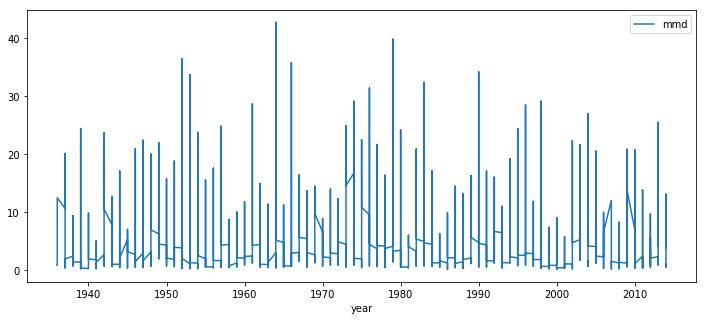

In [15]:
# Plot observed streamflow
obs_flow.plot(x="year", y="mmd", figsize=(12,5))

In [16]:
# check files in observed climate data folder
os.listdir(r.clim)

['climate_extension.R',
 'cwt.base',
 'cwt.Kdown_direct',
 'cwt.rain',
 'cwt.relative_humidity',
 'cwt.tmax',
 'cwt.tmin',
 'cwt.vpd',
 'cwt_ext.rain',
 'cwt_ext.tmax',
 'cwt_ext.tmin']

In [17]:
# check cwt.base text file in climate data folder
clim_file = r.clim + '/cwt.base'
clim_data = open(clim_file, 'r')
print(clim_data.read())

101 base_station_id
278391.71 x_coordinate
3882439.5 y_coordinate
638.0 z_coordinate
2.0 effective_lai
22.9 screen_height
clim/na annual_climate_prefix
0 number_non_critical_annual_sequences
clim/na monthly_climate_prefix
0 number_non_critical_monthly_sequences
clim/cwt_ext daily_climate_prefix
0 number_non_critical_daily_sequences
clim/na hourly_climate_prefix
0 number_non_critical_hourly_sequences



In [18]:
# if you want to change directories, you can use replace_string method
pr.utils.replace_string(clim_file, "clim", r.clim)

In [19]:
# check cwt.base text file in climate data folder
clim_file = r.clim + '/cwt.base'
clim_data = open(clim_file, 'r')
print(clim_data.read())

101 base_station_id
278391.71 x_coordinate
3882439.5 y_coordinate
638.0 z_coordinate
2.0 effective_lai
22.9 screen_height
/home/jovyan/work/notebooks/data/9c2c5df86f1a48c0a57c1d142b4dc9a4/9c2c5df86f1a48c0a57c1d142b4dc9a4/data/contents/rhessys_ws18_nlcd_local_choi/clim/na annual_/home/jovyan/work/notebooks/data/9c2c5df86f1a48c0a57c1d142b4dc9a4/9c2c5df86f1a48c0a57c1d142b4dc9a4/data/contents/rhessys_ws18_nlcd_local_choi/climate_prefix
0 number_non_critical_annual_sequences
/home/jovyan/work/notebooks/data/9c2c5df86f1a48c0a57c1d142b4dc9a4/9c2c5df86f1a48c0a57c1d142b4dc9a4/data/contents/rhessys_ws18_nlcd_local_choi/clim/na monthly_/home/jovyan/work/notebooks/data/9c2c5df86f1a48c0a57c1d142b4dc9a4/9c2c5df86f1a48c0a57c1d142b4dc9a4/data/contents/rhessys_ws18_nlcd_local_choi/climate_prefix
0 number_non_critical_monthly_sequences
/home/jovyan/work/notebooks/data/9c2c5df86f1a48c0a57c1d142b4dc9a4/9c2c5df86f1a48c0a57c1d142b4dc9a4/data/contents/rhessys_ws18_nlcd_local_choi/clim/cwt_ext daily_/home/jov

In [20]:
# check files in flows folder
os.listdir(r.flows)

['subflow.txt', 'surfflow.txt']

In [21]:
# open flow.txt 
flow_file = r.flows + '/surfflow.txt'
flow_data = open(flow_file, 'r')
print(flow_data.read())

1162 
43190 21116 211 351.0 488.0 980.8 1.00 0.00 5 40.7492 4 
42536 21117 211 0.30596 0.50 5.00
43191 21229 212 0.07302 0.50 5.00
42535 21117 211 0.21217 0.50 7.07
42537 21117 211 0.40885 0.50 7.07
43191 21229 212 351.0 489.0 979.4 1.00 0.00 5 46.35469 3 
42537 21117 211 0.59044 0.50 5.00
43190 21116 211 0.00000 0.50 5.00
42536 21117 211 0.40956 0.50 7.07
42534 21118 211 350.0 486.0 976.7 1.00 0.00 5 31.26527 4 
41880 21117 211 0.28898 0.50 5.00
42535 21117 211 0.00574 0.50 5.00
41879 21118 211 0.29148 0.50 7.07
41881 21117 211 0.41380 0.50 7.07
42535 21117 211 350.0 487.0 976.6 1.00 0.00 5 43.41574 6 
41881 21117 211 0.29386 0.50 5.00
42534 21118 211 0.00000 0.50 5.00
42536 21117 211 0.08803 0.50 5.00
41880 21117 211 0.20397 0.50 7.07
41882 21117 211 0.41413 0.50 7.07
43190 21116 211 0.00000 0.50 7.07
42536 21117 211 350.0 488.0 974.8 1.00 0.00 5 45.40398 7 
41882 21117 211 0.31182 0.50 5.00
42535 21117 211 0.00000 0.50 5.00
42537 21117 211 0.09234 0.50 5.00
43190 21116 211 0.00000 0

In [22]:
# check files in defs folder
os.listdir(r.defs)

['basin_basin.def',
 'hillslope_hillslope.def',
 'landuse_undeveloped.def',
 'landuse_undevelopedPRINT.def',
 'soil_loam_9.def',
 'soil_sandy_loam_12.def',
 'stratum_chestnut_oak_bgc.def',
 'stratum_eastern_white_pine.def',
 'stratum_nonveg.def',
 'zone_zone.def']

In [23]:
# open soil_loam.def file
soil_loam_file = r.defs + '/soil_loam_9.def'
soil_loam_data = open(soil_loam_file, 'r')
print(soil_loam_data.read())

9	patch_default_ID
0.000023	DOC_adsorption_rate
0.05	DOM_decay_rate
0.000001	DON_adsorption_rate
0.03	DON_production_rate
0.6	Ksat_0
0.6	Ksat_0_v
0.000005	NH4_adsorption_rate
0	NO3_adsorption_rate
0.12	N_decay
0	P3
10	active_zone_z
0.28	albedo
0.18	clay
1	deltaZ
0	detention_store_size
0.0062	gl_c
0.001	gsurf_intercept
0.01	gsurf_slope
0.001	interval_size
0.12	m
0.4	m_z
0	max_heat_capacity
-10	maximum_snow_energy_deficit
0	min_heat_capacity
-1.5	p4
0.204	pore_size_index
0.451	porosity_0
4000	porosity_decay
0.478	psi_air_entry
0.01	psi_max
0.43	sand
1	sat_to_gw_coeff
0.39	silt
10000	snow_light_ext_coef
0.05	snow_melt_Tcoef
0	snow_water_capacity
10	soil_depth
0	theta_mean_std_p1
0	theta_mean_std_p2
1	theta_psi_curve
1	maxrootdepth
2.65	particledensity
-1	soilc



In [24]:
# open hillslope_hillslope.def file
hillslope_hillslope_file = r.defs + '/hillslope_hillslope.def'
hillslope_hillslope_data = open(hillslope_hillslope_file, 'r')
print(hillslope_hillslope_data.read())

1 hillslope_default_ID
1.0 gw_loss_coeff
1.0 sat_to_gw_coeff



In [25]:
# check files in world folder
os.listdir(r.worldfiles)

['worldfile', 'worldfile.csv', 'worldfile.hdr']

In [26]:
# open world.hdr
world_hdr_file = r.worldfiles + '/worldfile.hdr'
world_hdr_data = open(world_hdr_file, 'r')
print(world_hdr_data.read())

1 num_basin_files
defs/basin_basin.def basin_default_filename
1 num_hillslope_files
defs/hillslope_hillslope.def hillslope_default_filename
1 num_zone_files
defs/zone_zone.def zone_default_filename
2 num_patch_files
defs/soil_loam_9.def patch_default_filename
defs/soil_sandy_loam_12.def patch_default_filename
2 num_landuse_files
defs/landuse_undeveloped.def landuse_default_filename
defs/landuse_undevelopedPRINT.def landuse_default_filename
3 num_stratum_files
defs/stratum_chestnut_oak_bgc.def stratum_default_filename
defs/stratum_eastern_white_pine.def stratum_default_filename
defs/stratum_nonveg.def stratum_default_filename
1 num_base_stations
clim/cwt.base base_station_filename



#### If you want to change the direcotry for definition files cosidering this system, you can try this:

In [27]:
# change the directory for definition files considering this system
pr.utils.replace_string(world_hdr_file, "defs", r.defs)

#### If you want to change the direcotry for base station files cosidering this system, you can try this:

In [28]:
# change the directory of base station file considering this system
pr.utils.replace_string(world_hdr_file, "clim", r.clim)

In [29]:
# check the directory of world.hdr
world_hdr_file = r.worldfiles + '/worldfile.hdr'
world_hdr_data = open(world_hdr_file, 'r')
print(world_hdr_data.read())

1 num_basin_files
/home/jovyan/work/notebooks/data/9c2c5df86f1a48c0a57c1d142b4dc9a4/9c2c5df86f1a48c0a57c1d142b4dc9a4/data/contents/rhessys_ws18_nlcd_local_choi/defs/basin_basin.def basin_default_filename
1 num_hillslope_files
/home/jovyan/work/notebooks/data/9c2c5df86f1a48c0a57c1d142b4dc9a4/9c2c5df86f1a48c0a57c1d142b4dc9a4/data/contents/rhessys_ws18_nlcd_local_choi/defs/hillslope_hillslope.def hillslope_default_filename
1 num_zone_files
/home/jovyan/work/notebooks/data/9c2c5df86f1a48c0a57c1d142b4dc9a4/9c2c5df86f1a48c0a57c1d142b4dc9a4/data/contents/rhessys_ws18_nlcd_local_choi/defs/zone_zone.def zone_default_filename
2 num_patch_files
/home/jovyan/work/notebooks/data/9c2c5df86f1a48c0a57c1d142b4dc9a4/9c2c5df86f1a48c0a57c1d142b4dc9a4/data/contents/rhessys_ws18_nlcd_local_choi/defs/soil_loam_9.def patch_default_filename
/home/jovyan/work/notebooks/data/9c2c5df86f1a48c0a57c1d142b4dc9a4/9c2c5df86f1a48c0a57c1d142b4dc9a4/data/contents/rhessys_ws18_nlcd_local_choi/defs/soil_sandy_loam_12.def pa

In [30]:
# check files in observed climate data folder
os.listdir(r.tecfiles)

['tec_daily.txt',
 'tec_daily_growth.txt',
 'tec_daily_state_output.txt',
 'tec_daily_state_output_backup.txt']

In [31]:
# check the directory in climate base file
tecfiles_file = r.tecfiles + '/tec_daily.txt'
tecfiles_data = open(tecfiles_file, 'r')
print(tecfiles_data.read())

1947 1 1 1 print_daily_on





## 6. Simulate RHESSys as a single run

### 6.1 Show and set parameters values 

In [32]:
# read parameter values from parameter_meta.json 
r.parameters

{'version': 'rhessys5.20.0',
 'start_date': '2010 01 01 01',
 'end_date': '2010 01 10 01',
 'gw1': 0.117211997411679,
 'gw2': 0.0659735129203182,
 's1': 10.1682388144545,
 's2': 0.997275193734094,
 's3': 1.84849880747497,
 'snowEs': 0.605362305999734,
 'snowTs': 1.02025739167741,
 'sv1': 1.73747300930697,
 'sv2': 172.427322705276,
 'svalt1': 0.928032172983822,
 'svalt2': 0.955452497987305}

In [33]:
# set parameter values 
r.parameters['version'] = 'rhessys5.20.0.develop'
r.parameters['start_date'] = '2005 01 01 01'
r.parameters['end_date'] = '2008 12 31 01'
r.parameters['gw1'] = '0.117211997411679'
r.parameters['gw2'] = '0.0659735129203182'
r.parameters['s1'] = '10.1682388144545'
r.parameters['s2'] = '0.997275193734094'
r.parameters['s3'] = '1.84849880747497'
r.parameters['snowEs'] = '0.605362305999734'
r.parameters['snowTs'] = '1.02025739167741'
r.parameters['sv1'] = '1.73747300930697'
r.parameters['sv2'] = '172.427322705276'
r.parameters['svalt1'] = '0.928032172983822'
r.parameters['svalt2'] = '0.955452497987305'

In [34]:
# check the change of parameter values
r.parameters

{'version': 'rhessys5.20.0.develop',
 'start_date': '2005 01 01 01',
 'end_date': '2008 12 31 01',
 'gw1': '0.117211997411679',
 'gw2': '0.0659735129203182',
 's1': '10.1682388144545',
 's2': '0.997275193734094',
 's3': '1.84849880747497',
 'snowEs': '0.605362305999734',
 'snowTs': '1.02025739167741',
 'sv1': '1.73747300930697',
 'sv2': '172.427322705276',
 'svalt1': '0.928032172983822',
 'svalt2': '0.955452497987305'}

### 6.2 Execute RHESSys as a single run

Sometimes the run method has an error during simulation. At this time, you can try the run again.If you still get an errors, it is probably due to different operating systems. In that case, you can copy commands from lines 1~9 of the generated running status below, and paste them into terminal window. Then you can check what the exact error is

In [35]:
# We can create some options to execute RHESSys considering different execution environments. 
# In this case, we use a local RHESSys execution file.
# Near future, we will add more options such as Docker
r.run("local")

cd /home/jovyan/work/notebooks/data/9c2c5df86f1a48c0a57c1d142b4dc9a4/9c2c5df86f1a48c0a57c1d142b4dc9a4/data/contents/rhessys_ws18_nlcd_local_choi/RHESSysEastCoast; ./rhessys5.20.0.develop -st 2005 01 01 01 -ed 2008 12 31 01 -b -gwtoriparian -t /home/jovyan/work/notebooks/data/9c2c5df86f1a48c0a57c1d142b4dc9a4/9c2c5df86f1a48c0a57c1d142b4dc9a4/data/contents/rhessys_ws18_nlcd_local_choi/tecfiles/tec_daily.txt -w /home/jovyan/work/notebooks/data/9c2c5df86f1a48c0a57c1d142b4dc9a4/9c2c5df86f1a48c0a57c1d142b4dc9a4/data/contents/rhessys_ws18_nlcd_local_choi/worldfiles/worldfile -whdr /home/jovyan/work/notebooks/data/9c2c5df86f1a48c0a57c1d142b4dc9a4/9c2c5df86f1a48c0a57c1d142b4dc9a4/data/contents/rhessys_ws18_nlcd_local_choi/worldfiles/worldfile.hdr -r /home/jovyan/work/notebooks/data/9c2c5df86f1a48c0a57c1d142b4dc9a4/9c2c5df86f1a48c0a57c1d142b4dc9a4/data/contents/rhessys_ws18_nlcd_local_choi/flows/subflow.txt /home/jovyan/work/notebooks/data/9c2c5df86f1a48c0a57c1d142b4dc9a4/9c2c5df86f1a48c0a57c1d14

### 6.3 Plot output

When you plot RHESSys daily output, you can use output variables (RHESSys Output Abbreviation) from the table below 

#### Basin Daily Output
 |                    RHESSys Output Abbreviation                   | Description |   Units |   
 |---------------------------------------------|-------------|-------------------|
 |         pot_surface_infil| Rain Throughfall    | mm          | 
 |       snow_thr        | Snow Throughfall    | mm         | 
 |sat_def_z  | Saturation Deficit with depth    | mm of depth          | 
 |sat_def | Saturation Deficit - volume  | mm of water       | 
 |rz_storage	|Rooting Zone Storage	|mm of water
 |unsat_stor|	Unsaturated Storage	|mm
 |rz_drainage|	Rooting Zone Drainage|	mm
 |unsat_drain|	Unsaturated| Storage	mm
 |cap	|Capillary Rise|	mm
 |evap	|Evaporation|	mm
 |snowpack	|Snow Water Equivalent (SWE)|	mm
 |trans	|Transpiration|	mm
 |baseflow	|Baseflow	|mm
 |return	|Return flow|	mm
 |streamflow	|Total Stream Outflow|	mm (normalized by basin area)
 | psn	|Net Photosynthesis	|kgC/m2
|lai	|Leaf Area Index	|m2/m2
|gw.Qout	|Groundwater Output	|mm
|gw.storage	|Groundwater Store	|mm
|detention_store|	Detention Store	|mm
|%sat_area|	Percent Saturated Area	|m2/m2
|litter_store|	Litter intercepted water Store	|m2/m2
|canopy_store|	Canopy Intercepted water Store	|m2/m2
|%snow_cover|	Percent Snow Cover	|m2/m2
|snow_subl|	Snow Sublimation	|
|trans_var|	Spatial variation in transpiration	|
|acc_trans		||
|acctransv_var		||
|pet	|Potential Evapotranspiration|	mm
|dC13		||
|precip	|Precipitation|	mm
|pcp_assim||		
|mortf	|Fraction of Basin that have tree mortality	|
|tmax	|Maximum Temperature	|°C
|tmin	|Minimum Temperature	|°C
|tavg	|Average Temperature	|°C
|vpd	|Vapor Pressure Deficit	|Pa
|snowfall	|Snowfall	|
|recharge	|_Recharge of water to soil	|
|gpsn	|Gross Photosynthesis	|kgC/m2
|resp	|_ Respiration_	|kgC/m2
|gs	|Canopy Conductance	|mm/s?
|rootdepth	|Rooting depth	|
|plantc	|Plant Carbon	|kgC/m2
|snowmelt	|Snow Melt	|
|canopysubl	|Canopy Sublimation	|
|routedstreamflow	||	
|canopy_snow	|Snow Intercepted on Canopy	|
|height	|Canopy height	|
|evap_can	|Canopy Evaporation?	|
|evap_lit	|Litter Evaporation_	|
|evap_soil	|Soil Evaporation_	|
|litrc	|Litter Carbon_	|
|Kdown	|Downward (from atmosphere) Direct Shortwave Radiation_	|
|Ldown	|Downward (from atmosphere) Longwave Radiation_	|
|Kup	|Reflected (upward) Shortwave Radiation_	|
|Lup	|Reflected (upward) Longwave Radiation_	|
|Kstar_can	|Absorbed shortwave by canopy	|
|Kstar_soil	|Absorbed shortwave by soil	|
|Kstar_snow	|Absorbed shortwave bysnow	|
|Lstar_can	|Absorbed longwave by canopy	|
|Lstar_soil	|Absorbed longwave by soil	|
|Lstar_snow	|Absorbed longwave by snow	|
|LE_canopy	|Latent heat evaporated by canopy	|
|LE_soil	La	||
|LE_snow		||
|Lstar_strat		||
|canopydrip		||
|ga	|Aerodynamic Conductance	|mm/s

In [36]:
# check output files
os.listdir(r.output)

['rhessys405test_basin.daily',
 'rhessys405test_basin.hourly',
 'rhessys405test_basin.monthly',
 'rhessys405test_basin.yearly',
 'rhessys405test_hillslope_hillslope_hillslope.params',
 'rhessys405test_landuse_undevelopedPRINT_landuse.params',
 'rhessys405test_landuse_undeveloped_landuse.params',
 'rhessys405test_stratum_chestnut_oak_bgc_stratum.params',
 'rhessys405test_stratum_eastern_white_pine_stratum.params',
 'rhessys405test_stratum_nonveg_stratum.params',
 'rhessys405test_zone_zone_zone.params',
 'rhessys405_basin.daily',
 'rhessys_run_hillslope_hillslope_hillslope.params',
 'rhessys_run_zone_zone_zone.params',
 'rhessys_run_landuse_undeveloped_landuse.params',
 'rhessys_run_landuse_undevelopedPRINT_landuse.params',
 'rhessys_run_stratum_chestnut_oak_bgc_stratum.params',
 'rhessys_run_stratum_eastern_white_pine_stratum.params',
 'rhessys_run_stratum_nonveg_stratum.params',
 'rhessys_run_basin.yearly',
 'rhessys_run_basin.monthly',
 'rhessys_run_basin.daily',
 'rhessys_run_basin.h

In [37]:
# create pandas dataframe and set date index of mode output
plot_data = pd.read_csv(r.output + "/rhessys_run" +'_basin.daily', delimiter=" ")
date_index = pd.date_range(r.parameters['start_date'][0:10], r.parameters['end_date'][0:10], freq='1D')
plot_data.insert(loc=0, column='Date', value=date_index[:-1].values)
plot_data.head()

,Date,day,month,year,basinID,rain_thr,snow_thr,sat_def_z,sat_def,rz_storage,...,apipedrainNO3,apipedrainNH4,apipedrainDON,apipedrainDOC,lawnIrrigated,laiNontree,PAR,unsat_cap,unsat_fc,rtz_fc
0,2005-01-01,1,1,2005,1,0.000000,0.0,172.807453,77.152065,38.319294,...,0.0,0.0,0.0,0.0,0.0,0.0,2.403771e+07,-368.871354,0.075327,75.542156
1,2005-01-02,2,1,2005,1,76.283192,0.0,261.498452,116.800218,71.205143,...,0.0,0.0,0.0,0.0,0.0,0.0,1.579369e+07,-329.223200,5.872839,105.355720
2,2005-01-03,3,1,2005,1,92.607709,0.0,288.400663,128.706636,75.754158,...,0.0,0.0,0.0,0.0,0.0,0.0,1.579369e+07,-317.316783,16.046064,103.795356
3,2005-01-04,4,1,2005,1,109.930404,0.0,262.730612,117.117847,59.515158,...,0.0,0.0,0.0,0.0,0.0,0.0,1.687168e+07,-328.905572,18.480634,89.922390
4,2005-01-05,5,1,2005,1,0.683619,0.0,452.301335,201.999308,111.206278,...,0.0,0.0,0.0,0.0,0.0,0.0,1.958067e+07,-244.024110,27.250134,159.668203


In [38]:
# check observed stramflow from section 5.2 to check start date
obs_flow.head()

,year,month,day,date,mmd
0,1936,11,1,1936-11-01,0.850
1,1936,11,2,1936-11-02,0.850
2,1936,11,3,1936-11-03,0.850
3,1936,11,4,1936-11-04,1.615
4,1936,11,5,1936-11-05,1.124


In [39]:
# check observed stramflow from section 5.2 to check end date
obs_flow.tail()

,year,month,day,date,mmd
28484,2014,10,27,2014-10-27,1.162
28485,2014,10,28,2014-10-28,1.125
28486,2014,10,29,2014-10-29,1.049
28487,2014,10,30,2014-10-30,1.011
28488,2014,10,31,2014-10-31,1.049


In [40]:
# set date index 
date_index = pd.date_range(start='1936-11-01', end='2014-10-31', freq='D')
date_index

DatetimeIndex(['1936-11-01', '1936-11-02', '1936-11-03', '1936-11-04',
               '1936-11-05', '1936-11-06', '1936-11-07', '1936-11-08',
               '1936-11-09', '1936-11-10',
               ...
               '2014-10-22', '2014-10-23', '2014-10-24', '2014-10-25',
               '2014-10-26', '2014-10-27', '2014-10-28', '2014-10-29',
               '2014-10-30', '2014-10-31'],
              dtype='datetime64[ns]', length=28489, freq='D')

In [41]:
# check date index
obs_data = obs_flow.set_index(date_index)
obs_data.head()

,year,month,day,date,mmd
1936-11-01,1936,11,1,1936-11-01,0.850
1936-11-02,1936,11,2,1936-11-02,0.850
1936-11-03,1936,11,3,1936-11-03,0.850
1936-11-04,1936,11,4,1936-11-04,1.615
1936-11-05,1936,11,5,1936-11-05,1.124


In [42]:
# clip observed streamflow as the same with simulation period
obs_data_f = obs_data['2005-01-01':'2008-12-31']
obs_data_f.head()

,year,month,day,date,mmd
2005-01-01,2005,1,1,2005-01-01,4.081
2005-01-02,2005,1,2,2005-01-02,3.996
2005-01-03,2005,1,3,2005-01-03,3.911
2005-01-04,2005,1,4,2005-01-04,3.845
2005-01-05,2005,1,5,2005-01-05,3.741


#### Create a simple plot from simulation output

In the ts_plot(time series plot) method, you can select a sim_output_variable from the Basin Daily Output table in section 6.3.

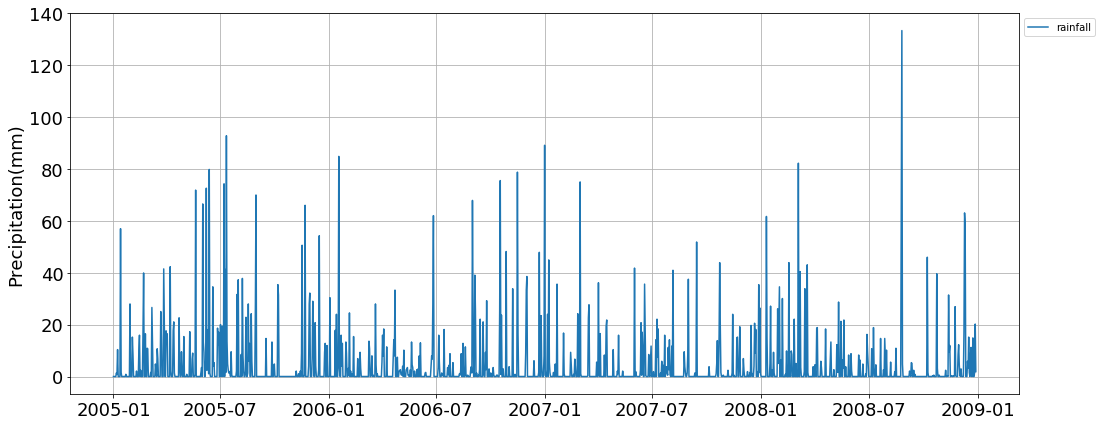

In [43]:
r.plotting.ts_plot(plot_data, 'precip', sim_label="rainfall")

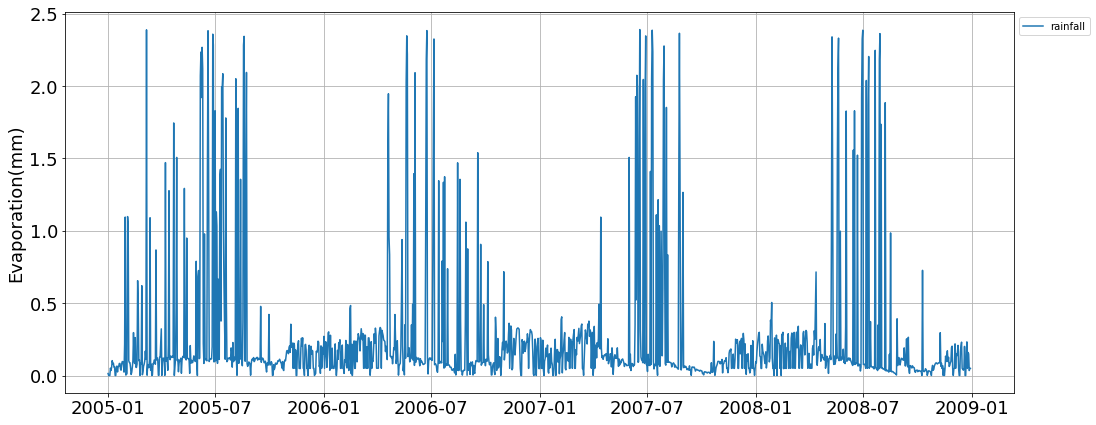

In [44]:
r.plotting.ts_plot(plot_data, 'evap', sim_label="rainfall")

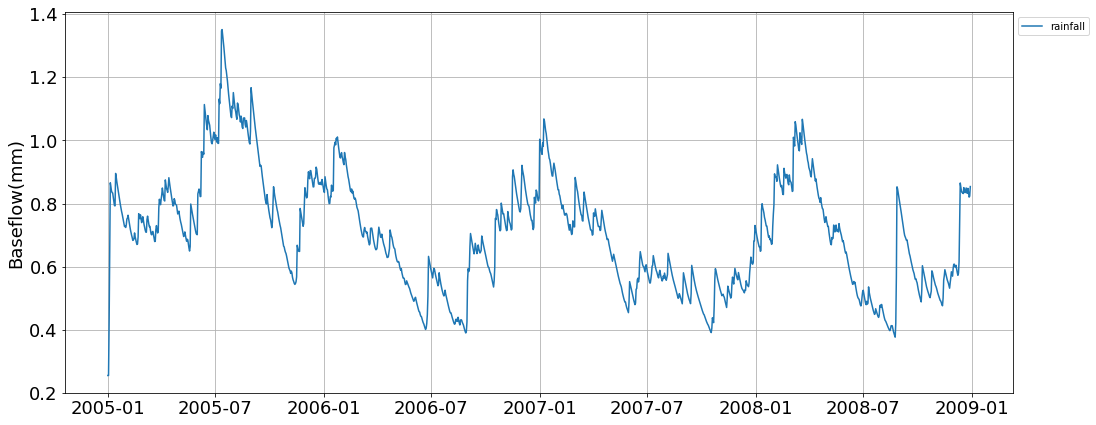

In [45]:
r.plotting.ts_plot(plot_data, 'baseflow', sim_label="rainfall")

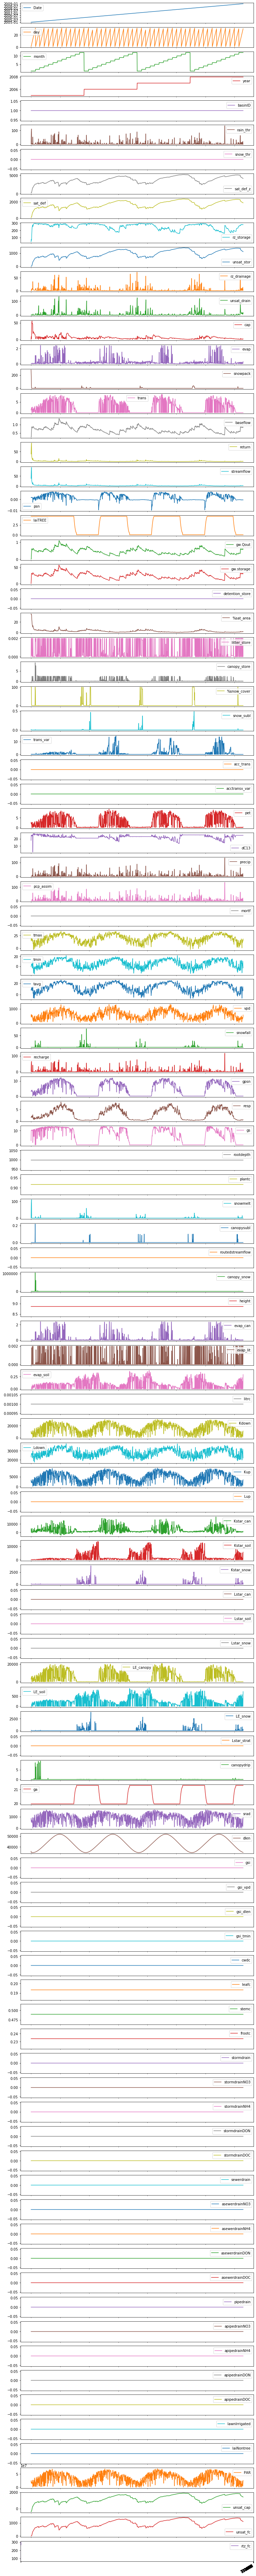

In [65]:
import matplotlib.pyplot as plt
plot_data.plot(subplots=True, figsize=(12,150))
plt.xticks(plot_data["Date"][:].values)
plt.legend() # relocates legend to best location

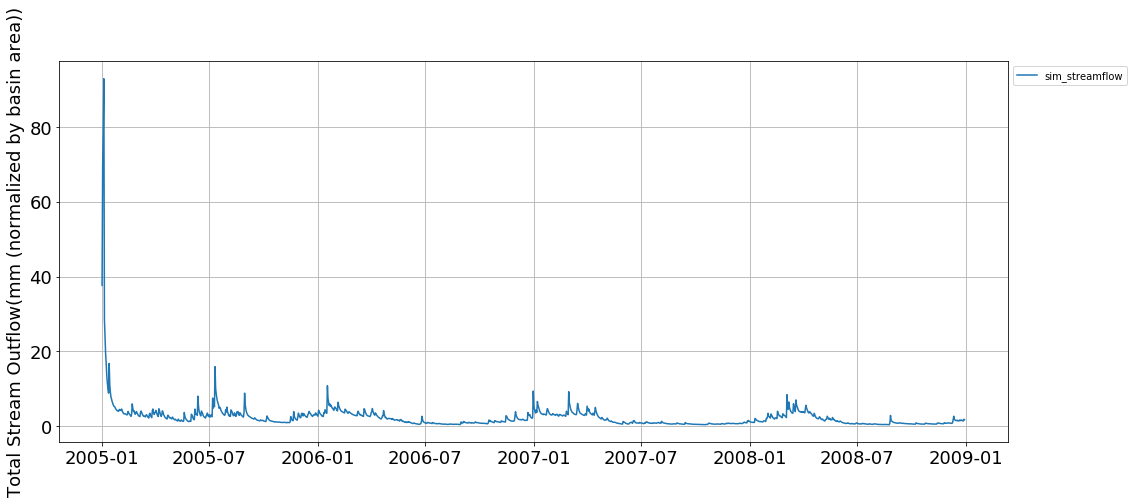

In [46]:
r.plotting.ts_plot(plot_data, sim_output_variable ='streamflow', sim_label="sim_streamflow")

#### Sometimes we need a warming period for certain initial periods of simulation. In this case, I recommend you to use the pre_trim setting to create an appropriate scale graph

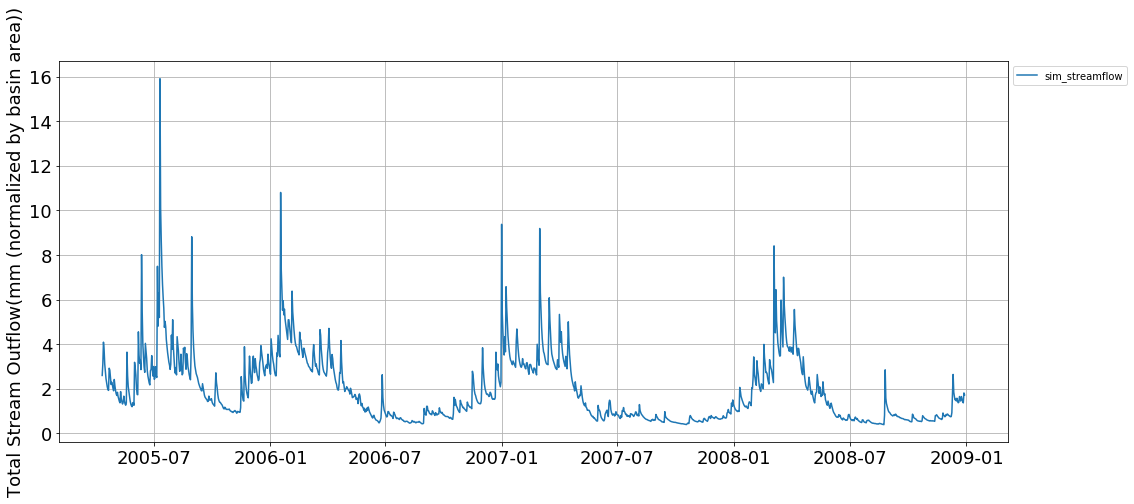

In [47]:
r.plotting.ts_plot(plot_data, sim_output_variable ='streamflow', sim_label="sim_streamflow", pre_trim =100, post_trim=-1)

#### When users want to compare simulation streamflow and observed streamflow, users can use the "ts_plot_obs" method

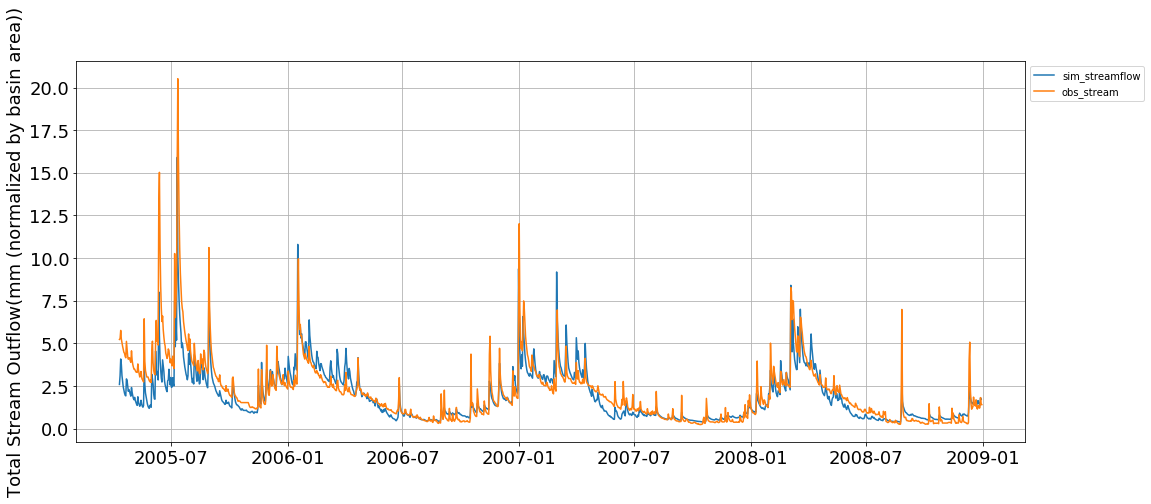

In [48]:
# compare simulation streamflow and observed streamflow
r.plotting.ts_plot_obs(sim_data=plot_data, sim_output_variable='streamflow', sim_label="sim_streamflow", obs_data=obs_data_f, obs_variable="mmd", obs_label="obs_stream", pre_trim =100)

## 8. Efficiency evaluation

In [49]:
# HydroEval is an open-source evaluator for streamflow time series in Python. "https://github.com/ThibHlln/hydroeval"
from hydroeval import *

In [50]:
# set simulation and observation data to evaluate 
simulation_streamflow = plot_data["streamflow"].values
obs_streamflow = obs_data_f["mmd"].values

In [51]:
# use the evaluator with the Root Mean Square Error
my_rmse = evaluator(rmse, simulation_streamflow[366:], obs_streamflow[366:-1])
my_rmse

array([0.61912181])

In [52]:
# use the evaluator with the Nash Sutcliffe Efficiency
my_nse = evaluator(nse, simulation_streamflow[366:], obs_streamflow[366:-1])
my_nse

array([0.81405171])